<a href="https://colab.research.google.com/github/tanisha1234-sys/ml-labeval/blob/main/lab_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

In [2]:
import pandas as pd
import pycaret

In [7]:
df = pd.read_csv('Fuel_cell_performance_data-Full.csv')


In [9]:
from pycaret.regression import *

data = df.drop(['Target1', 'Target2', 'Target3', 'Target5'], axis=1)
exp = setup(data = data, target = 'Target4', train_size = 0.8,
            normalize = True, normalize_method = 'robust',
            transformation = True, transformation_method = 'yeo-johnson',
            pca = True, pca_method = 'incremental',
            remove_outliers = True, outliers_threshold = 0.05,
            data_split_shuffle= True, session_id = 120)

,Description,Value
0,Session id,120
1,Target,Target4
2,Target type,Regression
3,Original data shape,"(1000, 16)"
4,Transformed data shape,"(960, 16)"
5,Transformed train set shape,"(760, 16)"
6,Transformed test set shape,"(200, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [10]:
models = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,1.9772,5.2388,2.2863,-0.0053,0.3622,0.4371,0.2860
llar,Lasso Least Angle Regression,1.9851,5.2751,2.2940,-0.0119,0.3636,0.4394,0.2750
lasso,Lasso Regression,1.9851,5.2751,2.2940,-0.0119,0.3636,0.4394,0.2930
dummy,Dummy Regressor,1.9851,5.2751,2.2940,-0.0119,0.3636,0.4394,0.2750
en,Elastic Net,1.9851,5.2751,2.2940,-0.0119,0.3636,0.4394,0.4050
br,Bayesian Ridge,1.9837,5.2748,2.2940,-0.0120,0.3635,0.4391,0.3630
ada,AdaBoost Regressor,1.9852,5.3314,2.3058,-0.0228,0.3645,0.4384,0.3770
ridge,Ridge Regression,1.9906,5.3686,2.3146,-0.0307,0.3660,0.4401,0.2690
lar,Least Angle Regression,1.9907,5.3696,2.3148,-0.0309,0.3660,0.4402,0.3770
lr,Linear Regression,1.9907,5.3696,2.3148,-0.0309,0.3660,0.4402,1.2830


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [15]:
results = pull()
print(results)

                         Model     MAE     MSE  RMSE      R2   RMSLE    MAPE
0  Orthogonal Matching Pursuit  1.9421  5.1075  2.26  0.0074  0.3763  0.4705


In [12]:
predictions = predict_model(models)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,1.9421,5.1075,2.2600,0.0074,0.3763,0.4705


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target4,prediction_label
422,35.500000,1.13,83.099998,42.200001,132.820007,48.799999,0.120,217.800003,177,1.02,99.018997,2.05,6074,19.799999,305,2.38,5.925038
691,54.599998,2.05,71.599998,31.459999,95.750000,28.799999,0.168,363.899994,306,0.59,99.961998,2.76,6752,32.400002,159,9.15,5.845202
612,69.199997,2.05,48.500000,25.629999,115.309998,45.200001,0.177,377.299988,304,1.90,100.065002,1.59,6577,31.500000,1175,4.84,5.890131
477,63.000000,2.54,88.300003,32.230000,97.650002,42.299999,0.135,104.300003,296,1.22,103.662003,2.40,9482,32.000000,1414,4.29,5.447761
862,60.799999,1.32,95.500000,23.950001,50.750000,25.500000,0.395,102.000000,320,0.75,98.463997,1.95,979,23.600000,263,9.72,5.936322


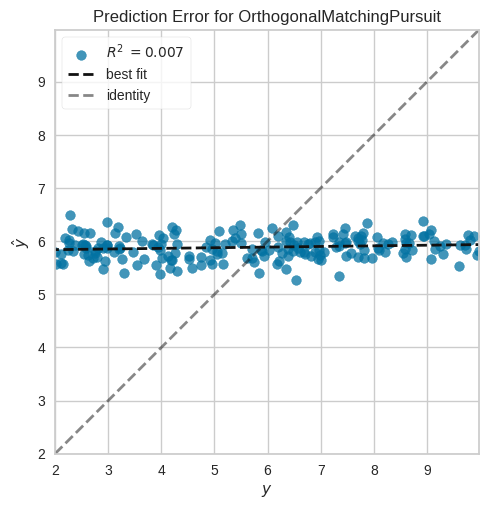

In [13]:
plot_model(models, plot = 'error')